## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from scipy.stats import zscore

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


In [3]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = education['YEAR'].unique()
    
    for column_name in columns:

        new_column = column_name + '_c'
        education[new_column] = education[column_name]
        
        for year in years:
            
            m=education[education['YEAR']==year][[new_column,'YEAR']].mean()
            mean = m.astype('float')
            
            group = (education['YEAR']==year)
    
            if math.isnan(mean[0]):            
                mean_r = education[new_column].mean()

            else:
                mean_r = education[education['YEAR']==year][new_column].mean()
                
            education.loc[group,new_column] = education.loc[group,new_column].fillna(mean_r)

                
    return 'Cleaning Done'

In [4]:
#Cleaning columns with mean per year
general_imputation_year(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])



'Cleaning Done'

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [5]:
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G_c,GRADES_8_G_c,GRADES_12_G_c,GRADES_1_8_G_c,GRADES_9_12_G_c,GRADES_ALL_G_c,AVG_MATH_4_SCORE_c,AVG_MATH_8_SCORE_c,AVG_READING_4_SCORE_c,AVG_READING_8_SCORE_c
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067


###  2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

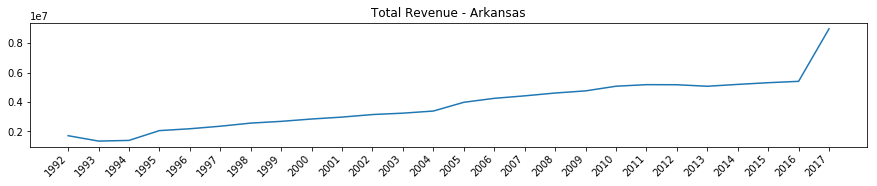

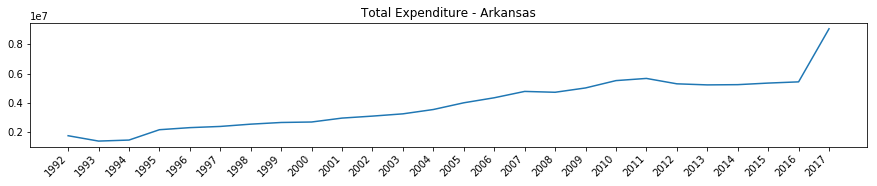

In [6]:
revenue=education[education['STATE']=='ARKANSAS'].groupby('YEAR')[['TOTAL_REVENUE_c']].sum()

expenditure = education[education['STATE']=='ARKANSAS'].groupby('YEAR')[['TOTAL_EXPENDITURE_c']].sum()

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(revenue)
plt.xticks(education.YEAR.unique())
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Total Revenue - Arkansas')
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
plt.plot(expenditure)
plt.xticks(education.YEAR.unique())
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Total Expenditure - Arkansas')
plt.show()



### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

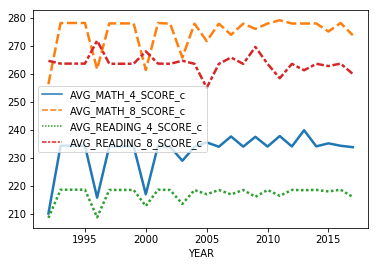

In [7]:
e_arkansas = education[education['STATE']=='ARKANSAS'].groupby('YEAR')[['AVG_MATH_4_SCORE_c','AVG_MATH_8_SCORE_c','AVG_READING_4_SCORE_c','AVG_READING_8_SCORE_c']].mean()
sns.lineplot(data=e_arkansas, palette="tab10", linewidth=2.5)

### _More successful are math and reading 8 grade_

### 4. What are the distributions of the math and reading scores in the sample?


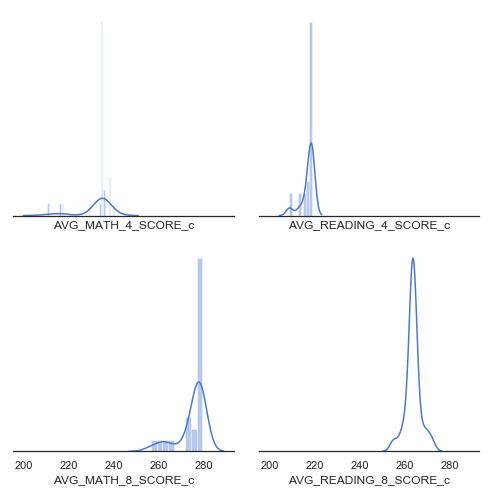

In [8]:
e_arkansas = education[education['STATE']=='ARKANSAS'][['AVG_MATH_4_SCORE_c','AVG_MATH_8_SCORE_c','AVG_READING_4_SCORE_c','AVG_READING_8_SCORE_c']]
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
#d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(e_arkansas['AVG_MATH_4_SCORE_c'], hist=True, color="b", ax=axes[0, 0])
sns.distplot(e_arkansas['AVG_READING_4_SCORE_c'], hist=True, color="b", ax=axes[0, 1])
sns.distplot(e_arkansas['AVG_MATH_8_SCORE_c'], hist=True, color="b", ax=axes[1, 0])
sns.distplot(e_arkansas['AVG_READING_8_SCORE_c'], hist=False, color="b", ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()


Text(0.5,1,'AVG_READING_8_SCORE')

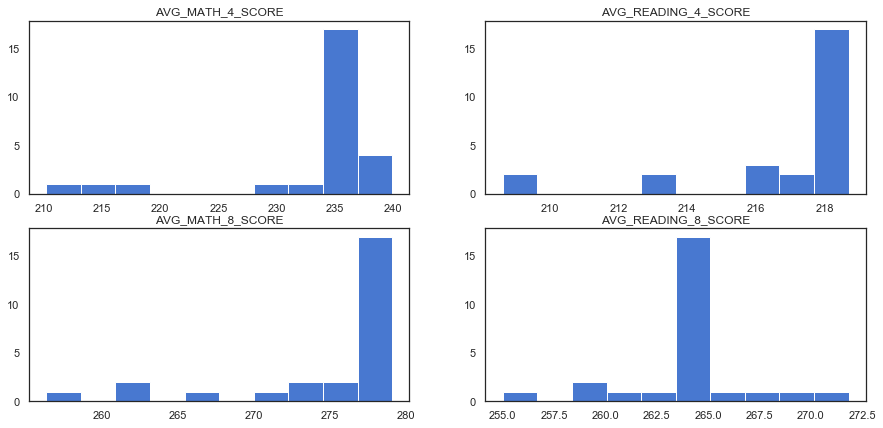

In [9]:
plt.figure(figsize = (15,7))

plt.subplot(2,2,1)
plt.hist(e_arkansas['AVG_MATH_4_SCORE_c'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(e_arkansas['AVG_READING_4_SCORE_c'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,3)
plt.hist(e_arkansas['AVG_MATH_8_SCORE_c'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,4)
plt.hist(e_arkansas['AVG_READING_8_SCORE_c'])
plt.title('AVG_READING_8_SCORE')



### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [10]:
import math

def interpolation(columns):

    """ Function: Apply interpolation 
        Parameters: a list of columns to clean
        Return: string
    """     
        
    for column in columns:
        
        new_column = column + '_i'
        education[new_column] = education[column]
        
        education[new_column]=education[new_column].interpolate(method='linear', limit_direction='forward', axis=0)

    return 'Interpolation Done'  


def general_imputation_mean_year(columns):
        
    """ Function: general_imputation based on a year
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = education['YEAR'].unique()
    
    for column_name in columns:

        new_column = column_name + '_mean'
        education[new_column] = education[column_name]
        
        for year in years:
            
            m=education[education['YEAR']==year][[new_column,'YEAR']].mean()
            mean = m.astype('float')
            
            group = (education['YEAR']==year)
    
            if math.isnan(mean[0]):            
                mean_r = education[new_column].mean()

            else:
                mean_r = education[education['YEAR']==year][new_column].mean()
                
            education.loc[group,new_column] = education.loc[group,new_column].fillna(mean_r)

                
    return 'Imputation (mean) Done'


def general_imputation_median_year(columns):
        
    """ Function: general_imputation based on a year
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = education['YEAR'].unique()
    
    for column_name in columns:

        new_column = column_name + '_median'
        education[new_column] = education[column_name]
        
        for year in years:
            
            m=education[education['YEAR']==year][[new_column,'YEAR']].median()
            median = m.astype('float')
            
            group = (education['YEAR']==year)
    
            if math.isnan(median[0]):            
                median_r = education[new_column].median()

            else:
                median_r = education[education['YEAR']==year][new_column].median()
                
            education.loc[group,new_column] = education.loc[group,new_column].fillna(median_r)

                
    return 'Imputation (median) Done'


In [11]:
interpolation(['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])



'Interpolation Done'

In [12]:
general_imputation_mean_year(['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])


'Imputation (mean) Done'

In [13]:
general_imputation_median_year(['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

'Imputation (median) Done'

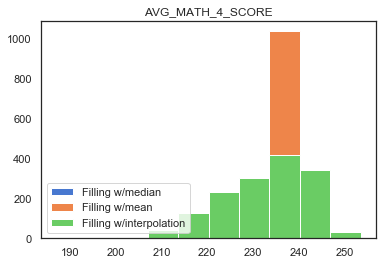

,AVG_MATH_4_SCORE_median,AVG_MATH_4_SCORE_mean,AVG_MATH_4_SCORE_i
count,1492.000000,1492.000000,1492.000000
mean,235.756792,234.166331,232.723472
std,6.650977,6.582731,9.405215
min,187.134670,187.134670,187.134670
25%,236.799561,233.990011,226.267129
50%,236.799561,234.152924,234.226904
75%,236.799561,234.351903,240.163315
max,253.420961,253.420961,253.420961


In [14]:
plt.hist(education['AVG_MATH_4_SCORE_median'], label='Filling w/median')
plt.hist(education['AVG_MATH_4_SCORE_mean'], label='Filling w/mean')
plt.hist(education['AVG_MATH_4_SCORE_i'], label='Filling w/interpolation')
plt.legend(loc='lower left')
plt.title('AVG_MATH_4_SCORE')
plt.show()


education[['AVG_MATH_4_SCORE_median','AVG_MATH_4_SCORE_mean','AVG_MATH_4_SCORE_i']].describe()

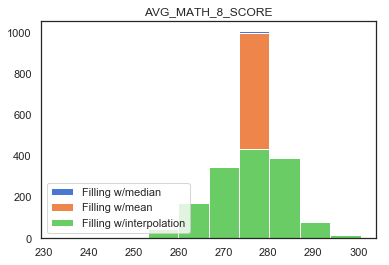

,AVG_MATH_8_SCORE_median,AVG_MATH_8_SCORE_mean,AVG_MATH_8_SCORE_i
count,1492.000000,1492.000000,1492.000000
mean,279.328810,277.967967,275.734024
std,6.358944,6.288719,8.754805
min,232.831510,232.831510,232.831510
25%,280.158848,277.855955,270.096001
50%,280.158848,277.954708,275.711254
75%,280.158848,278.105624,282.702092
max,300.568235,300.568235,300.568235


In [15]:
plt.hist(education['AVG_MATH_8_SCORE_median'], label='Filling w/median')
plt.hist(education['AVG_MATH_8_SCORE_mean'], label='Filling w/mean')
plt.hist(education['AVG_MATH_8_SCORE_i'], label='Filling w/interpolation')
plt.title('AVG_MATH_8_SCORE')
plt.legend(loc='lower left')
plt.show()

education[['AVG_MATH_8_SCORE_median','AVG_MATH_8_SCORE_mean','AVG_MATH_8_SCORE_i']].describe()

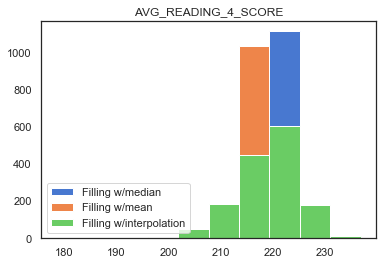

,AVG_READING_4_SCORE_median,AVG_READING_4_SCORE_mean,AVG_READING_4_SCORE_i
count,1492.000000,1492.000000,1492.000000
mean,219.608099,218.630513,218.971553
std,4.755179,4.717351,5.959927
min,178.557612,178.557612,178.557612
25%,220.143230,218.581228,216.126818
50%,220.143230,218.604227,219.771325
75%,220.143230,218.686805,222.684611
max,236.773867,236.773867,236.773867


In [16]:
plt.hist(education['AVG_READING_4_SCORE_median'], label='Filling w/median')
plt.hist(education['AVG_READING_4_SCORE_mean'], label='Filling w/mean')
plt.hist(education['AVG_READING_4_SCORE_i'], label='Filling w/interpolation')
plt.title('AVG_READING_4_SCORE')
plt.legend(loc='lower left')
plt.show()

education[['AVG_READING_4_SCORE_median','AVG_READING_4_SCORE_mean','AVG_READING_4_SCORE_i']].describe()

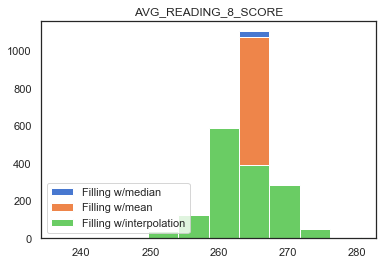

,AVG_READING_8_SCORE_median,AVG_READING_8_SCORE_mean,AVG_READING_8_SCORE_i
count,1492.000000,1492.000000,1491.000000
mean,264.165786,263.563582,263.267799
std,3.963715,3.949609,4.978792
min,236.379102,236.379102,236.379102
25%,264.466921,263.535778,260.490023
50%,264.466921,263.580017,262.617766
75%,264.466921,263.630005,266.849675
max,280.499130,280.499130,280.499130


In [17]:
plt.hist(education['AVG_READING_8_SCORE_median'], label='Filling w/median')
plt.hist(education['AVG_READING_8_SCORE_mean'], label='Filling w/mean')
plt.hist(education['AVG_READING_8_SCORE_i'].dropna(), label='Filling w/interpolation')
plt.legend(loc='lower left')
plt.title('AVG_READING_8_SCORE')
plt.show()

education[['AVG_READING_8_SCORE_median','AVG_READING_8_SCORE_mean','AVG_READING_8_SCORE_i']].describe()

#### Conclusions: When interpolation is used, standard deviation is always greater than other two results get from mean and median techniques.